In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cointegration_mult as mult

In [2]:
path_data_cart = 'datasets/data_cart.csv'

In [3]:
data = pd.read_csv(path_data_cart, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

18/04/2019 to 02/07/2020
data: (300, 71)
pairs: (1899, 12)


In [4]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,ABEV3,AZUL4,0.018109,95,0.117062,9,0.615910,1.124665,Short/Long,4,"100,220,240,250"
1,100,ABEV3,B3SA3,0.000230,99,0.235832,2,0.628383,0.275412,Long/Short,1,100
2,240,ABEV3,BBAS3,0.046590,95,0.220007,9,0.552417,0.889388,Short/Long,6,"100,160,180,200,220,240"
3,250,ABEV3,BBDC3,0.049430,90,0.342484,11,0.579072,0.894757,Short/Long,8,"100,120,140,160,180,200,220,250"
4,250,ABEV3,BBDC4,0.030424,95,0.349573,11,0.564318,0.781056,Short/Long,9,"100,120,140,160,180,200,220,240,250"
...,...,...,...,...,...,...,...,...,...,...,...,...
1894,250,USIM5,WEGE3,0.017265,95,0.283155,11,0.459567,0.417122,Long/Short,6,"160,180,200,220,240,250"
1895,100,VALE3,VIVT4,0.020266,95,1.331572,5,0.494147,0.097942,Long/Short,1,100
1896,250,VALE3,VVAR3,0.038695,95,1.138446,10,0.533416,0.406829,Short/Long,5,"100,200,220,240,250"
1897,240,VIVT4,VVAR3,0.043523,95,0.699206,11,0.437329,0.825008,Long/Short,6,"100,120,140,160,200,240"


In [70]:
pairs_signal = pairs.loc[(pairs['Signal'] >= 1) & (pairs['Signal'] <= 1.1)].copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal.shape

(85, 12)

In [71]:
pairs_signal = pairs_signal.loc[(pairs_signal['PeriodQt'] >= 6)].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,TAEE11,USIM5,0.000012,99,0.897740,4,0.486419,1.034950,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CYRE3,HYPE3,0.000664,99,1.669919,6,0.595116,1.043508,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,220,ABEV3,BRKM5,0.010461,95,0.290298,7,0.538785,1.089214,Short/Long,6,"120,140,160,180,200,220"
3,250,SBSP3,TAEE11,0.000810,99,4.264809,7,0.585534,1.027120,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,ITUB4,SANB11,0.003058,99,0.605866,7,0.902405,1.004738,Short/Long,9,"100,120,140,160,180,200,220,240,250"
5,250,B3SA3,CVCB3,0.003633,99,0.511100,7,0.607130,1.076474,Short/Long,7,"100,160,180,200,220,240,250"
6,250,GOAU4,MULT3,0.004644,99,0.351298,7,0.615459,1.075575,Short/Long,9,"100,120,140,160,180,200,220,240,250"
7,250,MULT3,UGPA3,0.010415,95,1.052114,8,0.687207,1.027984,Long/Short,6,"100,180,200,220,240,250"
8,250,ITSA4,ITUB4,0.010567,95,0.407919,8,0.953107,1.007758,Long/Short,9,"100,120,140,160,180,200,220,240,250"
9,250,GGBR4,MULT3,0.009245,95,0.722437,8,0.650026,1.050978,Short/Long,9,"100,120,140,160,180,200,220,240,250"


In [81]:
oper = pairs_signal.loc[(pairs_signal['PeriodQt'] >= 9) & (pairs_signal['ADF'] >= 95) & (pairs_signal['HalfLife'] <= 7)].sort_values(by=['HalfLife'], ascending=True).copy()
oper
#oper.to_csv('datasets/sinais/sinais_29062020.csv', index=False)

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,TAEE11,USIM5,0.000012,99,0.897740,4,0.486419,1.034950,Long/Short,9,"100,120,140,160,180,200,220,240,250"
1,250,CYRE3,HYPE3,0.000664,99,1.669919,6,0.595116,1.043508,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,SBSP3,TAEE11,0.000810,99,4.264809,7,0.585534,1.027120,Short/Long,9,"100,120,140,160,180,200,220,240,250"
4,250,ITUB4,SANB11,0.003058,99,0.605866,7,0.902405,1.004738,Short/Long,9,"100,120,140,160,180,200,220,240,250"
6,250,GOAU4,MULT3,0.004644,99,0.351298,7,0.615459,1.075575,Short/Long,9,"100,120,140,160,180,200,220,240,250"


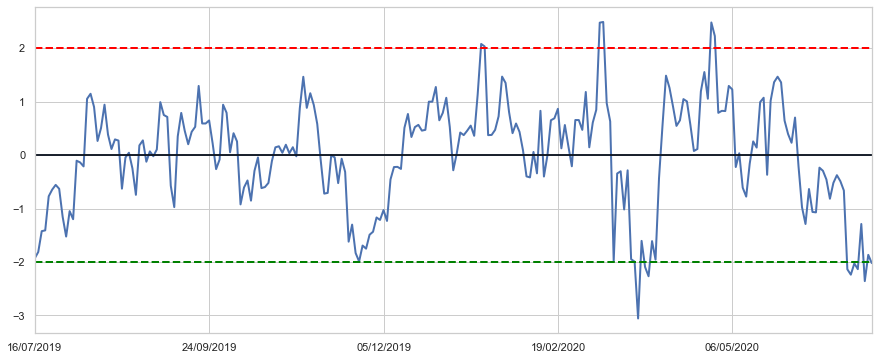

In [85]:
mult.plot_residue(mult.residue(data['TAEE11'], data['USIM5'], 241))

In [82]:
mult.analysis_by_periods(data['TAEE11'], data['USIM5'])

,Period,Stationary,Dickey-Fuller,ADF,Beta,HalfLife,Corr
0,100,True,0.006042,99,0.815269,3,0.549340
1,120,True,0.001534,99,0.835098,3,0.545858
2,140,True,0.001156,99,0.844951,3,0.537737
3,160,True,0.000763,99,0.903507,4,0.523489
4,180,True,0.000285,99,0.904751,4,0.515960
5,200,True,0.000067,99,0.901826,4,0.509384
6,220,True,0.000011,99,0.906800,3,0.494092
7,240,True,0.000014,99,0.902123,4,0.489256
8,250,True,0.000012,99,0.897740,4,0.486419


In [84]:
mult.dickey_fuller_ger(data['TAEE11'], data['USIM5'], 240)

{'statistic': -4.967687624584198, 'adf': 99}